# Game Plan for Exponential Smoothing and Holt-Winters

# Case Study Briefing: Customer Complaints

TelecoWave is a very big player in the telecom world and they're facing a challenge. Customer Complaints are all over the place. Some of the time its smooth sailing but some other time it's chaos. So they want us to predict this swing.

Our objective is to:
1. Help them achieve excellent customer service.
2. Show our proficiency in handling data.

The problem: Rollercoaster of complaints. They want to know how many Customer Service Reps they need for each week. If you get it wrong, you're either wasting resources or underestimate needs which leads to unhappy customers. So we need to craft our strategy to pick the right amount workforce.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data and setting the index
data = pd.read_csv("../dataset/weekly_customer_complaints.csv", index_col="week", parse_dates=True)
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,"1,750",37.26%,1,0,0
2018-01-08,"1,701",35.38%,0,0,0
2018-01-15,"1,711",36.22%,1,0,0
2018-01-22,"1,443",38.33%,1,0,0
2018-01-29,"1,397",36.34%,0,0,0


In [9]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq=None)

In [11]:
# Setting freq to W implies that the week starts on a Sunday, that's why the previous result shows freq=None
# data.asfreq('W')

# So we do it like this instead
data = data.asfreq('W-Mon')
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


In [12]:
data.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

## Data Pre-processing

In [6]:
# Remove comma and transform it into float
data['complaints'] = data['complaints'].str.replace(',','').astype(float)
data.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


## Exploratory Data Analysis

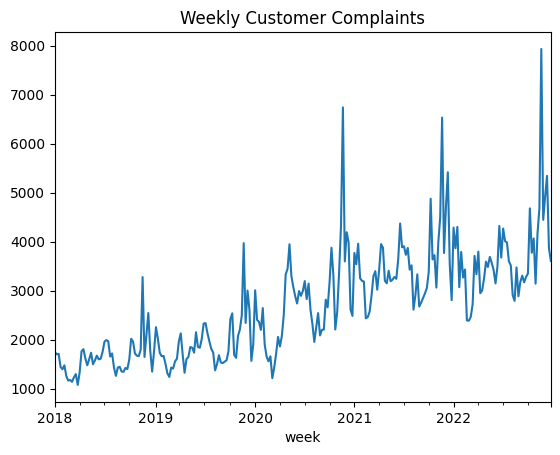

In [13]:
# Daily Closing Price Plot
data['complaints'].plot(title='Weekly Customer Complaints')
plt.show()

At first, it shows like a multiplicative models, but we are not sure yet. We'll have to make sure of it.

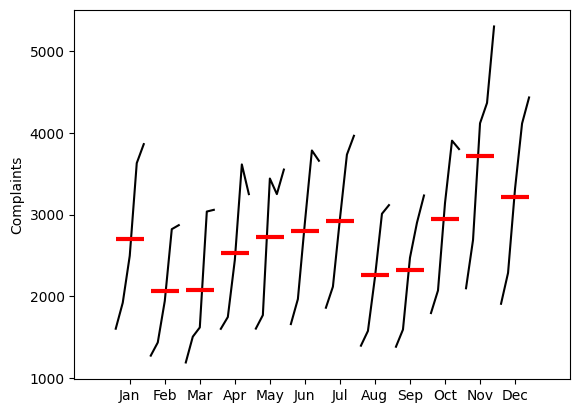

In [21]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['complaints'].resample('ME').mean(), ylabel='Complaints')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_12709/692138386.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(data['complaints'].resample('Q').mean(), ylabel='Complaints')


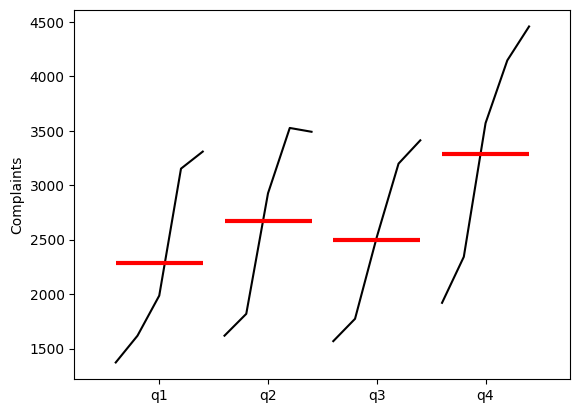

In [22]:
from statsmodels.graphics.tsaplots import quarter_plot

quarter_plot(data['complaints'].resample('Q').mean(), ylabel='Complaints')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Python Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(data['Close'], lags=100, ax=ax)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# Python Partial Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(data['Close'], lags=100, ax=ax)
plt.show()